In [1]:
%matplotlib inline

import sys
sys.path.insert(0,'../src')

import numpy as np
from matplotlib import pyplot as plt
import SimpleITK as sitk

from imagedisplay import myshow

<b>Otsu’s thresholding method</b> tries to minimize the weighted intra-class variance:
\begin{equation*}
\Sigma^2(t) = p( I(x) \leq t ) \cdot \sigma^2( I(x) \leq t ) + p( I(x) \gt t ) \cdot \sigma^2( I(x) \gt t )
\end{equation*}
The optimal threshold can be found via exhaustive search by computing $\Sigma^2(t)$ for all $t \in [0,255]$ and choosing the best one.

In [32]:
# Load input image
InputFilename = "../data/noisy.png"
image = sitk.ReadImage(InputFilename)

# Rescale image in range [0,255]
image = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkUInt8)

# Read maximum and minimum intensity values
stats = sitk.StatisticsImageFilter()
stats.Execute( image )
max = stats.GetMaximum()
min = stats.GetMinimum()
print 'Min intensity = {0} \nMax intensity = {1}'.format(min, max)

# Compute normalized image histogram
nbins = 256
img_data = sitk.GetArrayFromImage(image)
hist_norm,bins = np.histogram(img_data.flatten(),nbins,normed=True)
bins = np.arange(nbins)

# Compute cumulative distribution function
Q = hist_norm.cumsum()    

# Compute Otsu threshold value
fn_min = np.inf
thresh = -1
d = 1e-10

for i in xrange(0,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i]         # cumulative sum of classes
    b1,b2 = np.hsplit(bins,[i])      # weights

    # find means and variances
    #
    # Insert code here
    #
    u1 = b1 * p1 / (q1 + d)
    u2 = b2 * p2 / (q2 + d)
    v1 = (b1 - u1)**2 * (p1 / q1)

    v2 = (b2 - u2)**2 * (p2 / q2)

    # calculate the minimization function
    #
    # Insert code here
    #
    fn_curr = np.sum(q1 * v1) + np.sum(q2 * v2)

    if fn_curr < fn_min:
        fn_min = fn_curr
        thresh = i
       
print 'Otsu threshold value = %d\n' % thresh

Min intensity = 0.0 
Max intensity = 255.0
Otsu threshold value = 168



/homes/yt1109/myvenv/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in divide
/homes/yt1109/myvenv/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in divide
/homes/yt1109/myvenv/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in multiply


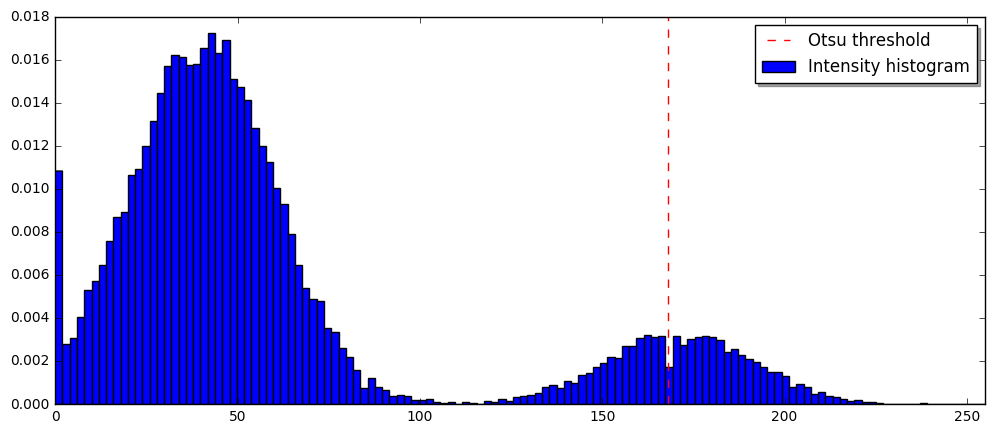

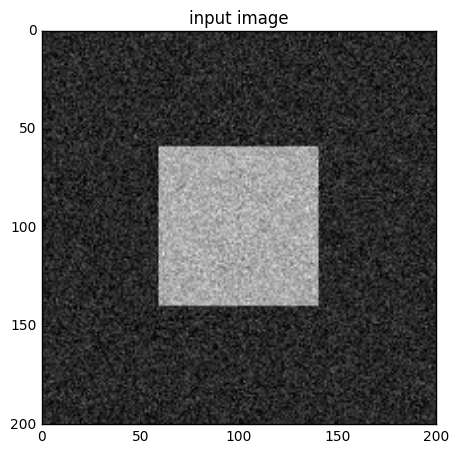

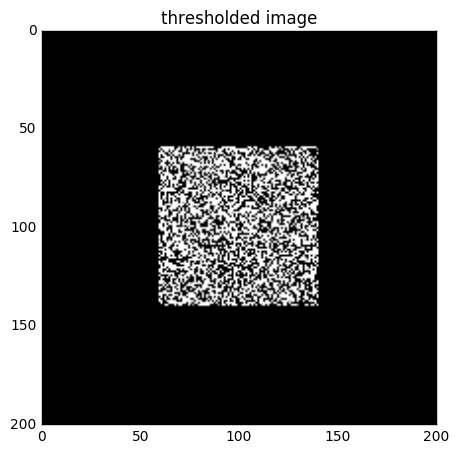

In [33]:
# Plot the intensity histogram
plt.figure(figsize=(12, 5), dpi=100)
plt.hist(img_data.flatten(), bins=128, range=(0, 255), normed=True, label='Intensity histogram')
plt.axvline(x=thresh, ymin=0, ymax=1, hold=None, linestyle='--', color='r', label='Otsu threshold')
plt.legend(loc=1, shadow=True)
x1,x2,y1,y2 = plt.axis(); plt.axis((0,255,y1,y2))
plt.show()        
        
# Compute the thresholded image 
image_thr=sitk.Threshold(image,0,thresh,255)
image_thr=sitk.Threshold(image_thr,thresh,255,0)

# Display the result
myshow(image,title='input image',dpi=48)
myshow(image_thr,title='thresholded image',dpi=48)